# <center>CPE111 Programming with Data Structures</center>
# <center>Lab 05 - Sorting Algorithm II</center>
---

<b>Practice I)</b> Advanced Sorting Algorithm

<b>Mission:</b>  Compare these sorting algorithms in List1 – List3 with the python’s built-in sort function, when 
n = 100, 200, 300, 400, 500,…, 1000, 5000 and then plot a graph of time operation by compare in 3 
cases: best case, average case (random) and worst case.

    List 1: Merge Sort
    List 2: Quick Sort
    List 3: Radix Sort

### List 1: Merge Sort

In [10]:
import random
import time
import matplotlib.pyplot as plt

MergeSort
-Average : [0.0, 0.001999378204345703, 0.0020029544830322266, 0.003000974655151367, 0.0040013790130615234, 0.004999399185180664, 0.005001544952392578, 0.006000041961669922, 0.011996269226074219, 0.018999338150024414, 0.026000261306762695, 0.03299903869628906, 0.040999650955200195, 0.050998687744140625, 0.05899810791015625, 0.0670011043548584, 0.07299947738647461]
-Best cases : [0.0010001659393310547, 0.002000093460083008, 0.0029993057250976562, 0.003000020980834961, 0.00299835205078125, 0.0039997100830078125, 0.003999948501586914, 0.00500035285949707, 0.010999917984008789, 0.01800060272216797, 0.023999452590942383, 0.03400087356567383, 0.03899812698364258, 0.04500007629394531, 0.060999393463134766, 0.05899930000305176, 0.06800174713134766]
-Worst cases : [0.0, 0.00099945068359375, 0.0020012855529785156, 0.00299835205078125, 0.0029997825622558594, 0.003002643585205078, 0.0049974918365478516, 0.00500178337097168, 0.011002540588378906, 0.01699972152709961, 0.023000478744506836, 

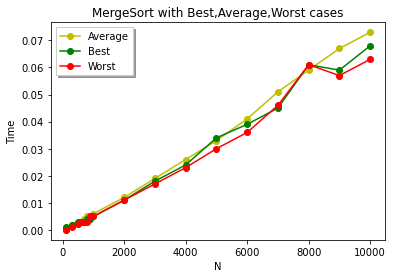

In [11]:
def merge(left, right, seq):
    i = j = 0
    while i + j < len(seq):
        if j == len(right) or (i < len(left) and left[i] < right[j]):
            seq[i+j] = left[i] # copy ith element of left as next item of seq
            i += 1
        else:
            seq[i+j] = right[j] # copy jth element of right as next item of seq
            j += 1
    return seq #ต้องทำการreturn ค่า เพื่อให้เก็บค่าไว้ไม่ให้เป็น none 

def merge_sort(seq):
    n = len(seq)
    if n < 2:
         return # list is already sorted
     # divide
    mid = n // 2
    left = seq[0:mid] # copy of first half
    right = seq[mid:n] # copy of second half
     # conquer (with recursion)
    merge_sort(left) # sort copy of first half
    merge_sort(right) # sort copy of second half
     # merge results
    seq = merge(left, right, seq)
    return seq


N = [100,300,500 ,600,700,800,900 ,1000 ,2000,3000,4000,5000,6000,7000,8000,9000,10000]
Time1 = []
Time2 = []
Time3 = []


for j in N:
    random_number = []  
    # *** ทำการหา Average *** 
    #โดย random เลขในแต่ละช่วงมา ซึ่งจะ random ทีละค่า ของ N มาใน for loop
    for i in range( 0 , j):
        #random ค่าช่วง 1 ถึง j โดยจะเก็บไว้ใน list ของ random_number
        random_number.append(random.randint(1,j))
   
    start1 = time.time()
    resu1 = merge_sort(random_number)
    end1 = time.time()
    elapsed1 = end1 - start1
    Time1.append(elapsed1)
    

    # *** ทำการหา Best cases *** 
    #จะหาโดย เอาผลที่ได้จากการ random [ได้ทำการเรียงค่ามาให้เรียบร้อยแล้ว] มาเข้า merge sort อีกรอบ
    start2 = time.time() #การจับเวลา 
    resu2 = merge_sort(resu1)
    end2 = time.time()
    elapsed2 = end2 - start2
    Time2.append(elapsed2)
    
    
    # *** ทำการหา Worst cases *** 
    #จะหาโดย เอาผลที่ได้จากการ Best cases [ได้ทำการเรียงค่ามาให้เรียบร้อยแล้ว] 
    #มา reversed เพราะเราต้องการให้มีการเรียงใหม่ทุกตัวเพื่อให้เป็น Worst cases แล้วนำมาเข้า merge sort อีกรอบ
    #ทำการ reversed 
    REVERSE= reversed(resu2)
    start3 = time.time()
    resu3 = merge_sort(list(REVERSE))
    end3 = time.time()
    elapsed3 = end3 - start3
    Time3.append(elapsed3)
    

# check ค่าที่ได้
print('MergeSort')   
print('-Average :',Time1)
print('-Best cases :',Time2)
print('-Worst cases :',Time3)

print('\n Then we plot the graph..')

#ทำการ plot กราฟ
time_ave = Time1
time_best = Time2
time_worst = Time3

#กำหนดชื่อกราฟ
plt.title('MergeSort with Best,Average,Worst cases')

#กำหนดชื่อแกน x
plt.xlabel("N")

#กำหนดชื่อแกน y
plt.ylabel("Time")

#plot แต่ละเส้น กำหนดให้สี เส้น ในแบบดังนี้..
plt.plot( N , time_ave, '-oy',
          N , time_best,'-og',
          N , time_worst,'-or')

#ใส่คำอธิบายว่า แต่ละเส้นบ่งบอกอะไร
#loc=2 คือตำแหน่งบนซ้าย  fancybox=0 คือทำให้กล่องข้อความเป็นเหลี่ยม ๆ  shadow=1 คือทำให้มีเงาตรงกล่องข้อความ
plt.legend(['Average','Best','Worst'],loc=2,fancybox=0,shadow=1)

#แสดงกราฟ
plt.show()

### List 2: Quick Sort

In [12]:
import random
import time
import matplotlib.pyplot as plt

Quick Sort
-Average : [0.0, 0.0, 0.002000570297241211, 0.0019981861114501953, 0.0009996891021728516, 0.002000093460083008, 0.002000093460083008, 0.002999544143676758, 0.0050013065338134766, 0.007001161575317383, 0.013994932174682617, 0.013999700546264648, 0.02299666404724121, 0.023000240325927734, 0.02300286293029785, 0.025998830795288086, 0.028999805450439453]
-Best cases : [0.0, 0.00099945068359375, 0.0, 0.00099945068359375, 0.0019998550415039062, 0.0019998550415039062, 0.0019996166229248047, 0.002999544143676758, 0.004998683929443359, 0.005999565124511719, 0.012003660202026367, 0.015001058578491211, 0.019519329071044922, 0.014999151229858398, 0.016997337341308594, 0.019000768661499023, 0.02299952507019043]
-Worst cases : [0.0, 0.0009989738464355469, 0.00099945068359375, 0.0010001659393310547, 0.0010001659393310547, 0.0010008811950683594, 0.002002716064453125, 0.0019991397857666016, 0.0050013065338134766, 0.005999088287353516, 0.013000249862670898, 0.010999917984008789, 0.01400160789

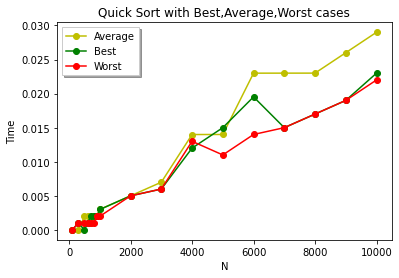

In [13]:
def quick_sort(seq): 
    if len(seq) < 2 : return seq 
    mid = len(seq)//2 
    pi = seq[mid] 
    seq = seq[:mid] + seq[mid+1:] 
    lo = [x for x in seq if x <= pi] 
    hi = [x for x in seq if x > pi] 
    return quick_sort(lo) + [pi] + quick_sort(hi) 


N = [100,300,500 ,600,700,800,900 ,1000 ,2000,3000,4000,5000,6000,7000,8000,9000,10000]
Time1 = []
Time2 = []
Time3 = []

for j in N:
    random_number = []  
    # *** ทำการหา Average *** 
    #โดย random เลขในแต่ละช่วงมา ซึ่งจะ random ทีละค่า ของ N มาใน for loop
    for i in range( 0 , j):
        #random ค่าช่วง 1 ถึง j โดยจะเก็บไว้ใน list ของ random_number
        random_number.append(random.randint(1,j))
   
    MaxNum = max(random_number)
    digits = findigit(MaxNum)

    start1 = time.time()
    resu1 = quick_sort(random_number)
    end1 = time.time()
    elapsed1 = end1 - start1
    Time1.append(elapsed1)
    

    # *** ทำการหา Best cases *** 
    #จะหาโดย เอาผลที่ได้จากการ random [ได้ทำการเรียงค่ามาให้เรียบร้อยแล้ว] มาเข้า quick sort อีกรอบ
    start2 = time.time() #การจับเวลา 
    resu2 = quick_sort(resu1)
    end2 = time.time()
    elapsed2 = end2 - start2
    Time2.append(elapsed2)
    
    
    # *** ทำการหา Worst cases *** 
    #จะหาโดย เอาผลที่ได้จากการ Best cases [ได้ทำการเรียงค่ามาให้เรียบร้อยแล้ว] 
    #มา reversed เพราะเราต้องการให้มีการเรียงใหม่ทุกตัวเพื่อให้เป็น Worst cases แล้วนำมาเข้า quick sort อีกรอบ
    #ทำการ reversed 
    REVERSE= reversed(resu2)
    start3 = time.time()
    resu3 = quick_sort(list(REVERSE))
    end3 = time.time()
    elapsed3 = end3 - start3
    Time3.append(elapsed3)
    

# check ค่าที่ได้
print('Quick Sort')   
print('-Average :',Time1)
print('-Best cases :',Time2)
print('-Worst cases :',Time3)

print('\n Then we plot the graph..')

#ทำการ plot กราฟ
time_ave = Time1
time_best = Time2
time_worst = Time3

#กำหนดชื่อกราฟ
plt.title('Quick Sort with Best,Average,Worst cases')

#กำหนดชื่อแกน x
plt.xlabel("N")

#กำหนดชื่อแกน y
plt.ylabel("Time")

#plot แต่ละเส้น กำหนดให้สี เส้น ในแบบดังนี้..
plt.plot( N , time_ave, '-oy',
          N , time_best,'-og',
          N , time_worst,'-or')

#ใส่คำอธิบายว่า แต่ละเส้นบ่งบอกอะไร
#loc=2 คือตำแหน่งบนซ้าย  fancybox=0 คือทำให้กล่องข้อความเป็นเหลี่ยม ๆ  shadow=1 คือทำให้มีเงาตรงกล่องข้อความ
plt.legend(['Average','Best','Worst'],loc=2,fancybox=0,shadow=1)

#แสดงกราฟ
plt.show()

### List 3: Radix Sort

In [14]:
import random
import time
import matplotlib.pyplot as plt

RedixSort
-Average : [0.0010001659393310547, 0.0030317306518554688, 0.00699925422668457, 0.00699925422668457, 0.007999420166015625, 0.00899958610534668, 0.008998870849609375, 0.014998435974121094, 0.029999256134033203, 0.0410001277923584, 0.05399894714355469, 0.10300111770629883, 0.12799978256225586, 0.10199904441833496, 0.1550004482269287, 0.16900014877319336, 0.2089979648590088]
-Best cases : [0.0009992122650146484, 0.0029649734497070312, 0.004999399185180664, 0.007002830505371094, 0.007000923156738281, 0.007998943328857422, 0.009001493453979492, 0.014000177383422852, 0.026999473571777344, 0.07099747657775879, 0.0839998722076416, 0.11600017547607422, 0.09900021553039551, 0.12999939918518066, 0.14100003242492676, 0.1680009365081787, 0.20300006866455078]
-Worst cases : [0.0010008811950683594, 0.003001689910888672, 0.0049991607666015625, 0.005997657775878906, 0.00700068473815918, 0.008001089096069336, 0.04699993133544922, 0.012999773025512695, 0.02700042724609375, 0.04100346565246582, 0

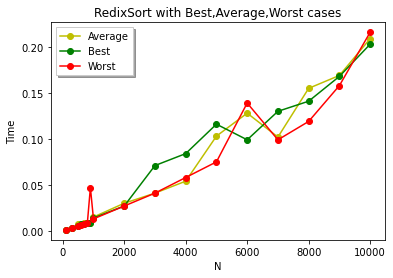

In [15]:
class ListNode( object ):
    def __init__( self, item ) :
        self._item = item
        self._next = None

class LQueue :
    # Constructs an empty queue.
    def __init__( self ):
        self._head = None
        self._tail = None
        self._size = 0

    # Return True if the queue is empty or False otherwise.
    def isEmpty(self):
        return len(self) == 0      #เก็บค่าเพื่อเช็คว่าขนาดของตัวแปรในqueueว่างไหม
    
    # Returns the number of items in the queue.
    def __len__( self ):
          return self._size           #เก็บค่าขนาดของqueue
        
    # Removes and return the first (head of the linked list) item from the queue
    def dequeue(self):
        assert not self.isEmpty(),"Queue is empty"      #ตรวจสอบขนาดของ queue ว่าว่างมั้ย เพื่อให้สามารถนำค่าออกจาก queue ได้
        item = self._head._item   #เก็บค่าตัวแรกของqueueไว้ในตัวแปร item
        self._head = self._head._next  #ให้ head ตัวปัจจุบันเคลื่อนไปอยู่ค่าถัดไป
        self._size -= 1 #ลดขนาดของ queue ออก ให้เท่ากับตัวแปรที่นำออก
        return item #เก็บค่าตัวแปร item
        
    # add a new item onto the last of the queue (tail of the linked list).
    def enqueue( self, item ):
        #assert not
        newNode = ListNode(item)  #
        if self._size == 0:  #เช็คขนาดของ queue ว่าว่างไหมถ้าว่างให้สร้างเพิ่ม
            self._head = newNode #สร้าง node ใหม่ให้อยู่ที่ส่วนต้น
        else:
            self._tail._next = newNode #สร้างตัวท้ายตัวใหม่ให้เป็น newNode
        self._tail = newNode #ให้ค่าตัวท้ายสุดให้เป็น newNode
        self._size += 1 #เพิ่มขนาดของ queue ให้เท่ากับจำนวนตัวแปรที่เพิ่มเข้ามา

    # Traversing a linked list
    def __repr__(self):
        curNode = self._head
        s = "["
        while curNode is not None:
            #print(curNode.item)
            s = s + str(curNode._item)+ " "
            curNode = curNode._next

        s = s[:-1] + "]"
        return s
    
    def __str__(self):
        curNode = self._head
        s = "["
        while curNode is not None:
            #print(curNode.item)
            s = s + str(curNode._item)+ " "
            curNode = curNode._next
        s = s[:-1] + "]"
        return s
        
    # Determines if an item is contained in the queue.
    def isContain( self, target ):
        curNode = self._head
        while curNode is not None and curNode._item != target :
            curNode = curNode._next
        return curNode is not None
    
import ctypes

class Array :
# Creates an array with size elements.
    def __init__( self, size ):
        #assert เอาไว้debug โปรแกรม
        assert size > 0, "Array size must be > 0"
        self._size = size
        # Create the array structure using the ctypes module.
        PyArrayType = ctypes.py_object * size
        self._elements = PyArrayType()
        # Initialize each element.
        self.clear( None ) #มีวงเล็บคือเป็น method 
        
    # Returns the size of the array.
    #__len__ เอาไว้ในคลาสที่สร้างขึ้น เมื่อใช้ฟังก์ชัน len เมธอดนี้จะถูกเรียกใช้ ทำให้สามารถหาค่าความยาวของออบเจ็กต์ได้
    def __len__( self ): #มี_  2 อัน 
        return self._size
    
    # Gets the contents of the index element.
    #__getitem__ คือเมื่อมีการเรียก [] เมธอดดังกล่าวจะถูกเรียกตาม ผลลัพธ์จากสิ่งที่คนกลับของเมธอดนี้ ก็จะเป็นผลลัพธ์ของการใช้งาน []
    def __getitem__( self, index ):
        assert index >= 0 and index < len(self), "Array subscript out of range"
        return self._elements[ index ]
    
    # Puts the value in the array element at index position.
    def __setitem__( self, index, value ):
        assert index >= 0 and index < len(self), "Array subscript out of range"
        self._elements[ index ] = value
    
    # + 
    def __add__(self,rhsArray):
        assert self._size == rhsArray._size, "Array can't be added"
        newArray = Array(self._size)
        for i in range(self._size):
            newArray[i] = self[i] + rhsArray[i]
        return newArray
    
    # Clears the array by setting each element to the given value.
    def clear( self, value ):
        for i in range( len(self) ) :
            self._elements[i] = value
            
    # Returns the array's iterator for traversing the elements.
    # __iter__ ปกติก็จะแค่ใส่คำสั่ง return ให้ส่งค่าคืนกลับเป็นตัวออบเจกต์ของอิเทอเรเตอร์
    def __iter__( self ):
        
        return _ArrayIterator( self._elements )
    
    # Returns the string reputation of an object
    #__repr__ จะทำให้เราสามารถ represent object ออกมาในที่เราต้องการได้
    def __repr__(self):
        s = '[ '
        for x in self._elements:
            s = s + str(x) + ', '
        s = s[:-2] + ' ]'
        return s    
            

# An iterator for the Array ADT.
class _ArrayIterator :
    def __init__( self, theArray ):
        self._arrayRef = theArray
        self._curNdx = 0
    # __iter__ ปกติก็จะแค่ใส่คำสั่ง return ให้ส่งค่าคืนกลับเป็นตัวออบเจกต์ของอิเทอเรเตอร์
    def __iter__( self ):
        return self
    
    #__next__ คือเมธอดที่จะทำงานเมื่อมีการใช้ฟังก์ชัน next 
    def __next__( self ):
        if self._curNdx < len( self._arrayRef ) :
            entry = self._arrayRef[ self._curNdx ]
            self._curNdx += 1
            return entry
        else :
            raise StopIteration
            
    
def radixSort( seq, numDigits ):
     # Create an array of queues to represent the bins.
    binArray = Array(10)
    for k in range( 10 ):
         binArray[k] = LQueue()
 # The value of the current column.
    column = 1
 # Iterate over the number of digits in the largest value.
    for d in range( numDigits ):
 # Distribute the keys across the 10 bins.
            for key in seq :
                 digit = (key // column) % 10
                 binArray[digit].enqueue( key )
 # Gather the keys from the bins and place them back in intList.
            i = 0
            for bin in range(len(binArray)) :
                 while not binArray[bin].isEmpty() :
                        seq[i] = binArray[bin].dequeue()
                        i += 1
 # Advance to the next column value.
            column *= 10
    return seq

def findigit(num):
    if num % 10 < num:
        if num % 100 < num:
            if num % 1000 < num:
                if num % 10000 < num:
                    return 5
                else :
                    return 4
            else:
                return 3

        else:
            return 2
    else:
        return 1

N = [100,300,500 ,600,700,800,900 ,1000 ,2000,3000,4000,5000,6000,7000,8000,9000,10000]
Time1 = []
Time2 = []
Time3 = []

for j in N:
    random_number = []  
    # *** ทำการหา Average *** 
    #โดย random เลขในแต่ละช่วงมา ซึ่งจะ random ทีละค่า ของ N มาใน for loop
    for i in range( 0 , j):
        #random ค่าช่วง 1 ถึง j โดยจะเก็บไว้ใน list ของ random_number
        random_number.append(random.randint(1,j))
   
    MaxNum = max(random_number)
    digits = findigit(MaxNum)

    start1 = time.time()
    resu1 = radixSort(random_number,digits)
    end1 = time.time()
    elapsed1 = end1 - start1
    Time1.append(elapsed1)
    

    # *** ทำการหา Best cases *** 
    #จะหาโดย เอาผลที่ได้จากการ random [ได้ทำการเรียงค่ามาให้เรียบร้อยแล้ว] มาเข้า radixsort อีกรอบ
    start2 = time.time() #การจับเวลา 
    resu2 =radixSort(resu1,digits)
    end2 = time.time()
    elapsed2 = end2 - start2
    Time2.append(elapsed2)
    
    
    # *** ทำการหา Worst cases *** 
    #จะหาโดย เอาผลที่ได้จากการ Best cases [ได้ทำการเรียงค่ามาให้เรียบร้อยแล้ว] 
    #มา reversed เพราะเราต้องการให้มีการเรียงใหม่ทุกตัวเพื่อให้เป็น Worst cases แล้วนำมาเข้า radixSort อีกรอบ
    #ทำการ reversed 
    REVERSE= reversed(resu2)
    start3 = time.time()
    resu3 = radixSort(list(REVERSE),digits)
    end3 = time.time()
    elapsed3 = end3 - start3
    Time3.append(elapsed3)
    

# check ค่าที่ได้
print('RedixSort')   
print('-Average :',Time1)
print('-Best cases :',Time2)
print('-Worst cases :',Time3)

print('\n Then we plot the graph..')

#ทำการ plot กราฟ
time_ave = Time1
time_best = Time2
time_worst = Time3

#กำหนดชื่อกราฟ
plt.title('RedixSort with Best,Average,Worst cases')

#กำหนดชื่อแกน x
plt.xlabel("N")

#กำหนดชื่อแกน y
plt.ylabel("Time")

#plot แต่ละเส้น กำหนดให้สี เส้น ในแบบดังนี้..
plt.plot( N , time_ave, '-oy',
          N , time_best,'-og',
          N , time_worst,'-or')

#ใส่คำอธิบายว่า แต่ละเส้นบ่งบอกอะไร
#loc=2 คือตำแหน่งบนซ้าย  fancybox=0 คือทำให้กล่องข้อความเป็นเหลี่ยม ๆ  shadow=1 คือทำให้มีเงาตรงกล่องข้อความ
plt.legend(['Average','Best','Worst'],loc=2,fancybox=0,shadow=1)

#แสดงกราฟ
plt.show()

---